<a href="https://colab.research.google.com/github/andresaraque28/Ganaderia_De_Precision/blob/main/FinalV_yolov8_Ganaderia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ganaderia de precision

En este Colab, se lleva a cabo el entrenamiento y las pruebas con el objetivo de realizar la identificación y el conteo de vacas. Este proceso se realiza utilizando el algoritmo YOLOv8, que es conocido por su eficacia en la detección de objetos. La aplicación de YOLOv8 permite lograr una identificación precisa de las vacas en imágenes y realizar un conteo confiable de las mismas.



##Base de datos

In [ ]:
# Descargar el archivo zip
!wget https://storage.googleapis.com/theos-development-static-v1/cowsV82.zip

--2024-02-10 19:36:43--  https://storage.googleapis.com/theos-development-static-v1/cowsV82.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.207, 64.233.181.207, 64.233.182.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7685710227 (7.2G) [application/zip]
Saving to: ‘cowsV82.zip’

cowsV82.zip         100%[===================>]   7.16G  69.5MB/s    in 56s     

2024-02-10 19:37:40 (130 MB/s) - ‘cowsV82.zip’ saved [7685710227/7685710227]



In [ ]:
# Descomprimir el archivo zip
!unzip cowsV82.zip -d cowsV82

Archive:  cowsV82.zip
   creating: cowsV82/cows2v8/
  inflating: cowsV82/cows2v8/configuration.yaml  
   creating: cowsV82/cows2v8/train/
   creating: cowsV82/cows2v8/train/images/
  inflating: cowsV82/cows2v8/train/images/15ea8b35-bdb4-49c0-bea8-380fd3113804.JPG  
  inflating: cowsV82/cows2v8/train/images/e473e165-ebd7-4b7e-8653-2cc120bdd072.JPG  
  inflating: cowsV82/cows2v8/train/images/048af31c-be85-4060-9b0f-d1a0ec467577.JPG  
  inflating: cowsV82/cows2v8/train/images/04cc41d1-de5c-4ee9-a07f-89c73aa8a0ed.JPG  
  inflating: cowsV82/cows2v8/train/images/b642c05c-a42f-4116-be6f-099dcdbb2fa6.JPG  
  inflating: cowsV82/cows2v8/train/images/63df0582-6333-4411-b0e4-a8c399b6c097.JPG  
  inflating: cowsV82/cows2v8/train/images/b352d759-76d1-4f81-9137-c830f6be61f2.JPG  
  inflating: cowsV82/cows2v8/train/images/92761b7e-9466-4e22-9857-fe75e125e942.JPG  
  inflating: cowsV82/cows2v8/train/images/45867f18-7208-4dd4-9a42-876a36517cd8.JPG  
  inflating: cowsV82/cows2v8/train/images/fbdc3f95-cfa

##Instalacion ultralytics

In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.2/78.2 GB disk)


##Entrenamiento modelo

In [4]:
#se importa yolo
from ultralytics import YOLO

!yolo mode=checks



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 393, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
 

In [ ]:
#se entrena el modelo a partir de los mejores pesos obtenidos en entrenamientos anteriores por ello se definieron pocas epocas
!yolo task=detect mode=train model=yolov8n.pt data='/content/cowsV82/cows2v8/configuration.yaml' epochs=40 imgsz=640 patience=8

100% 6.23M/6.23M [00:00<00:00, 70.6MB/s]
New https://pypi.org/project/ultralytics/8.1.11 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/cowsV82/cows2v8/configuration.yaml, epochs=40, patience=8, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=Fa

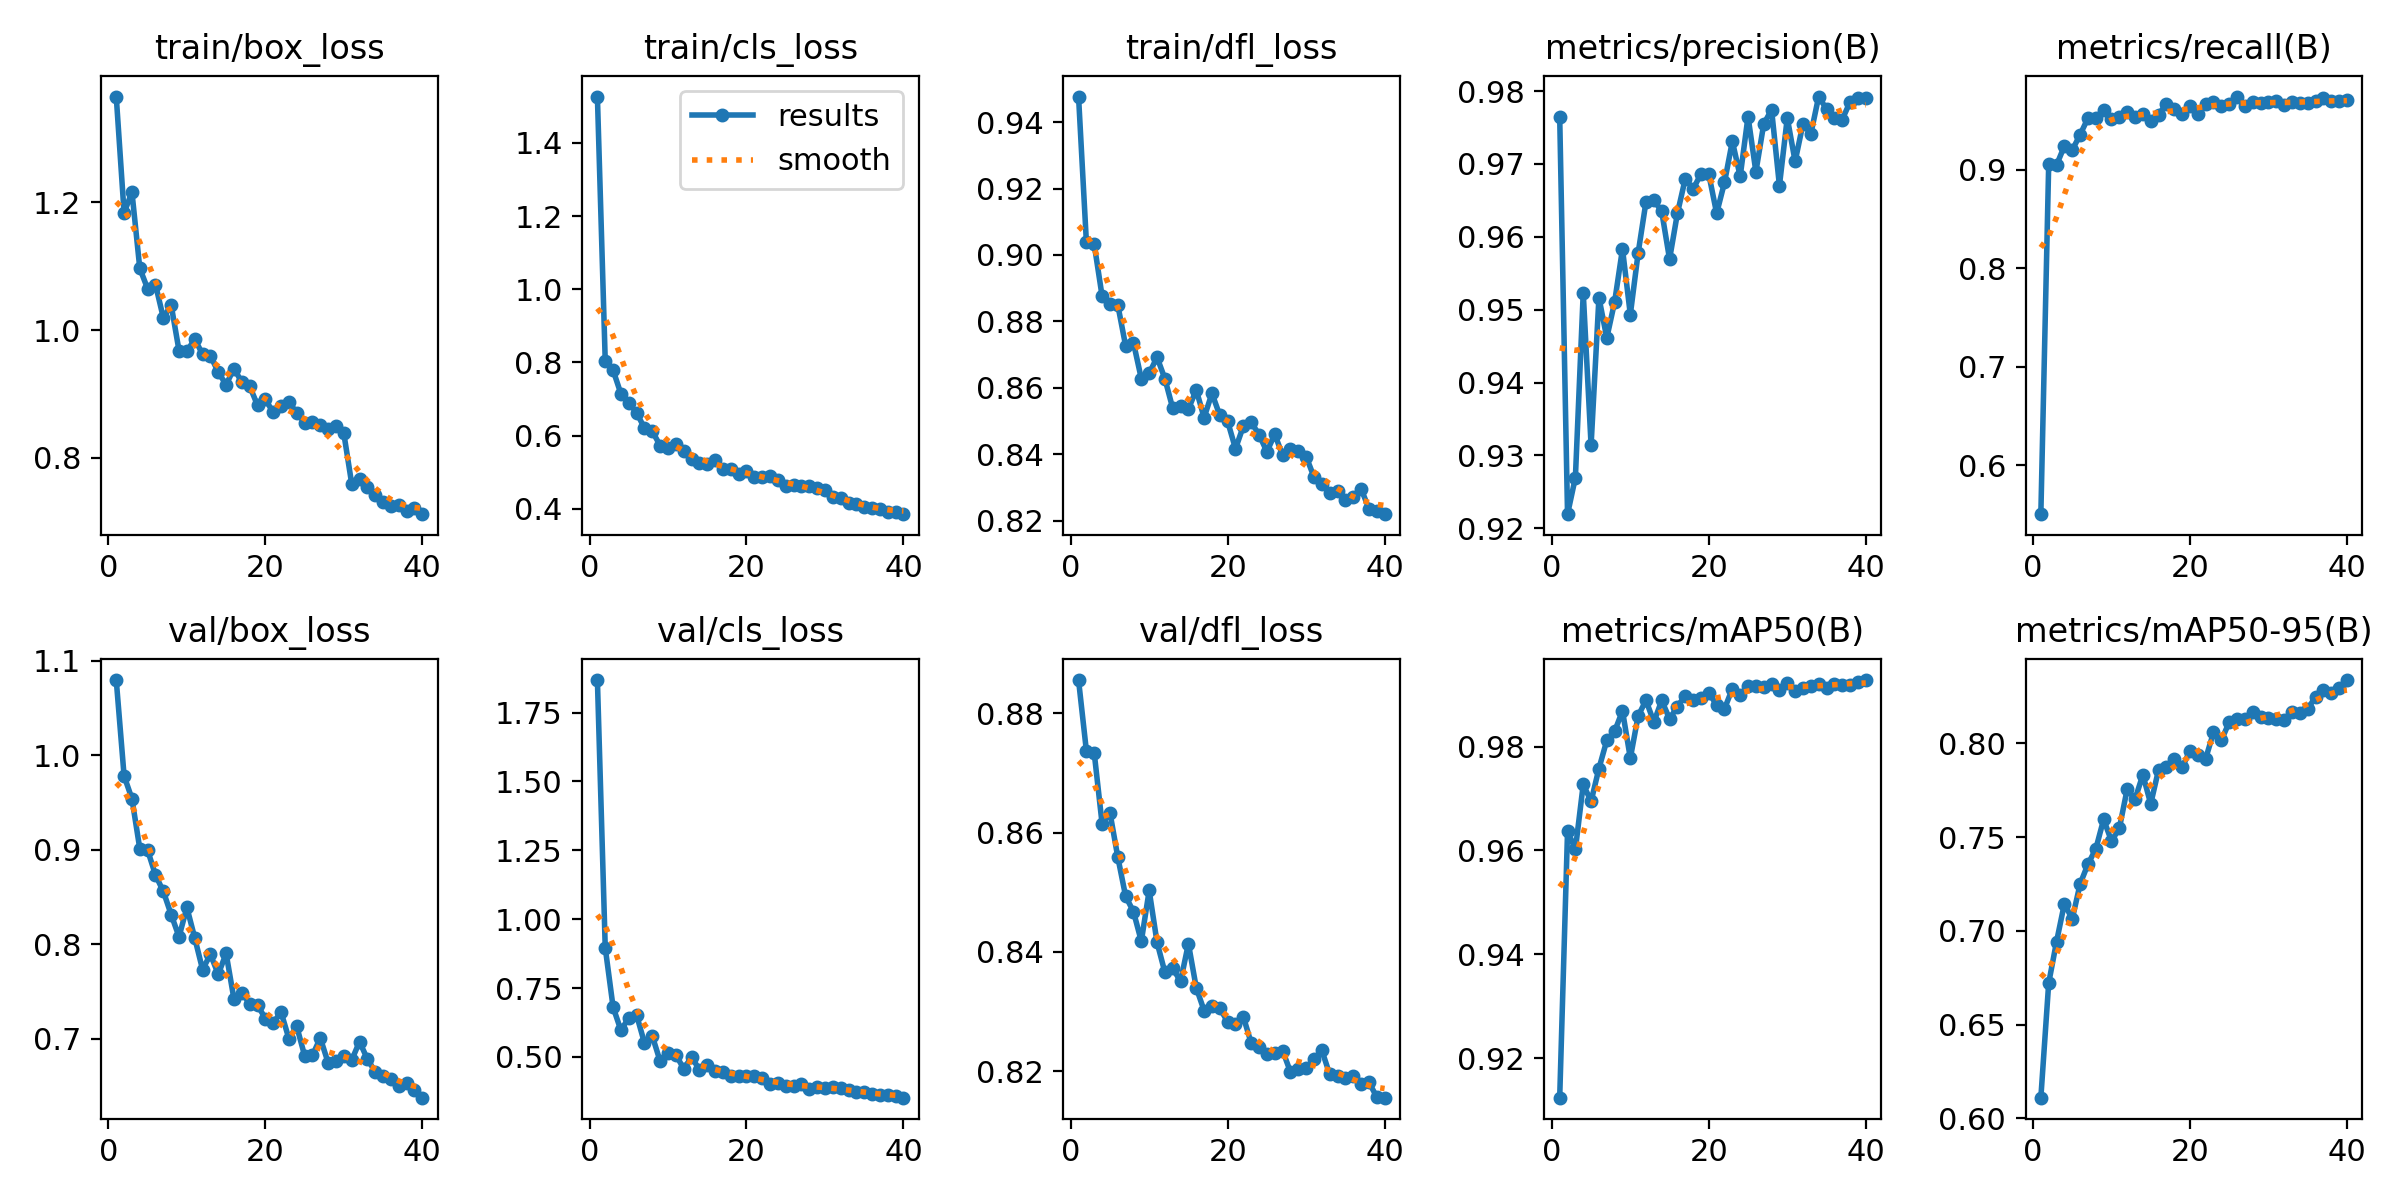

In [ ]:
from IPython.display import Image, display, HTML
titulo = 'resultados'

# Mostrar la imagen y el título
display(HTML(f'<h2>{titulo}</h2>'))
Image(filename= f'/content/runs/detect/train/results.png', width= 600 )

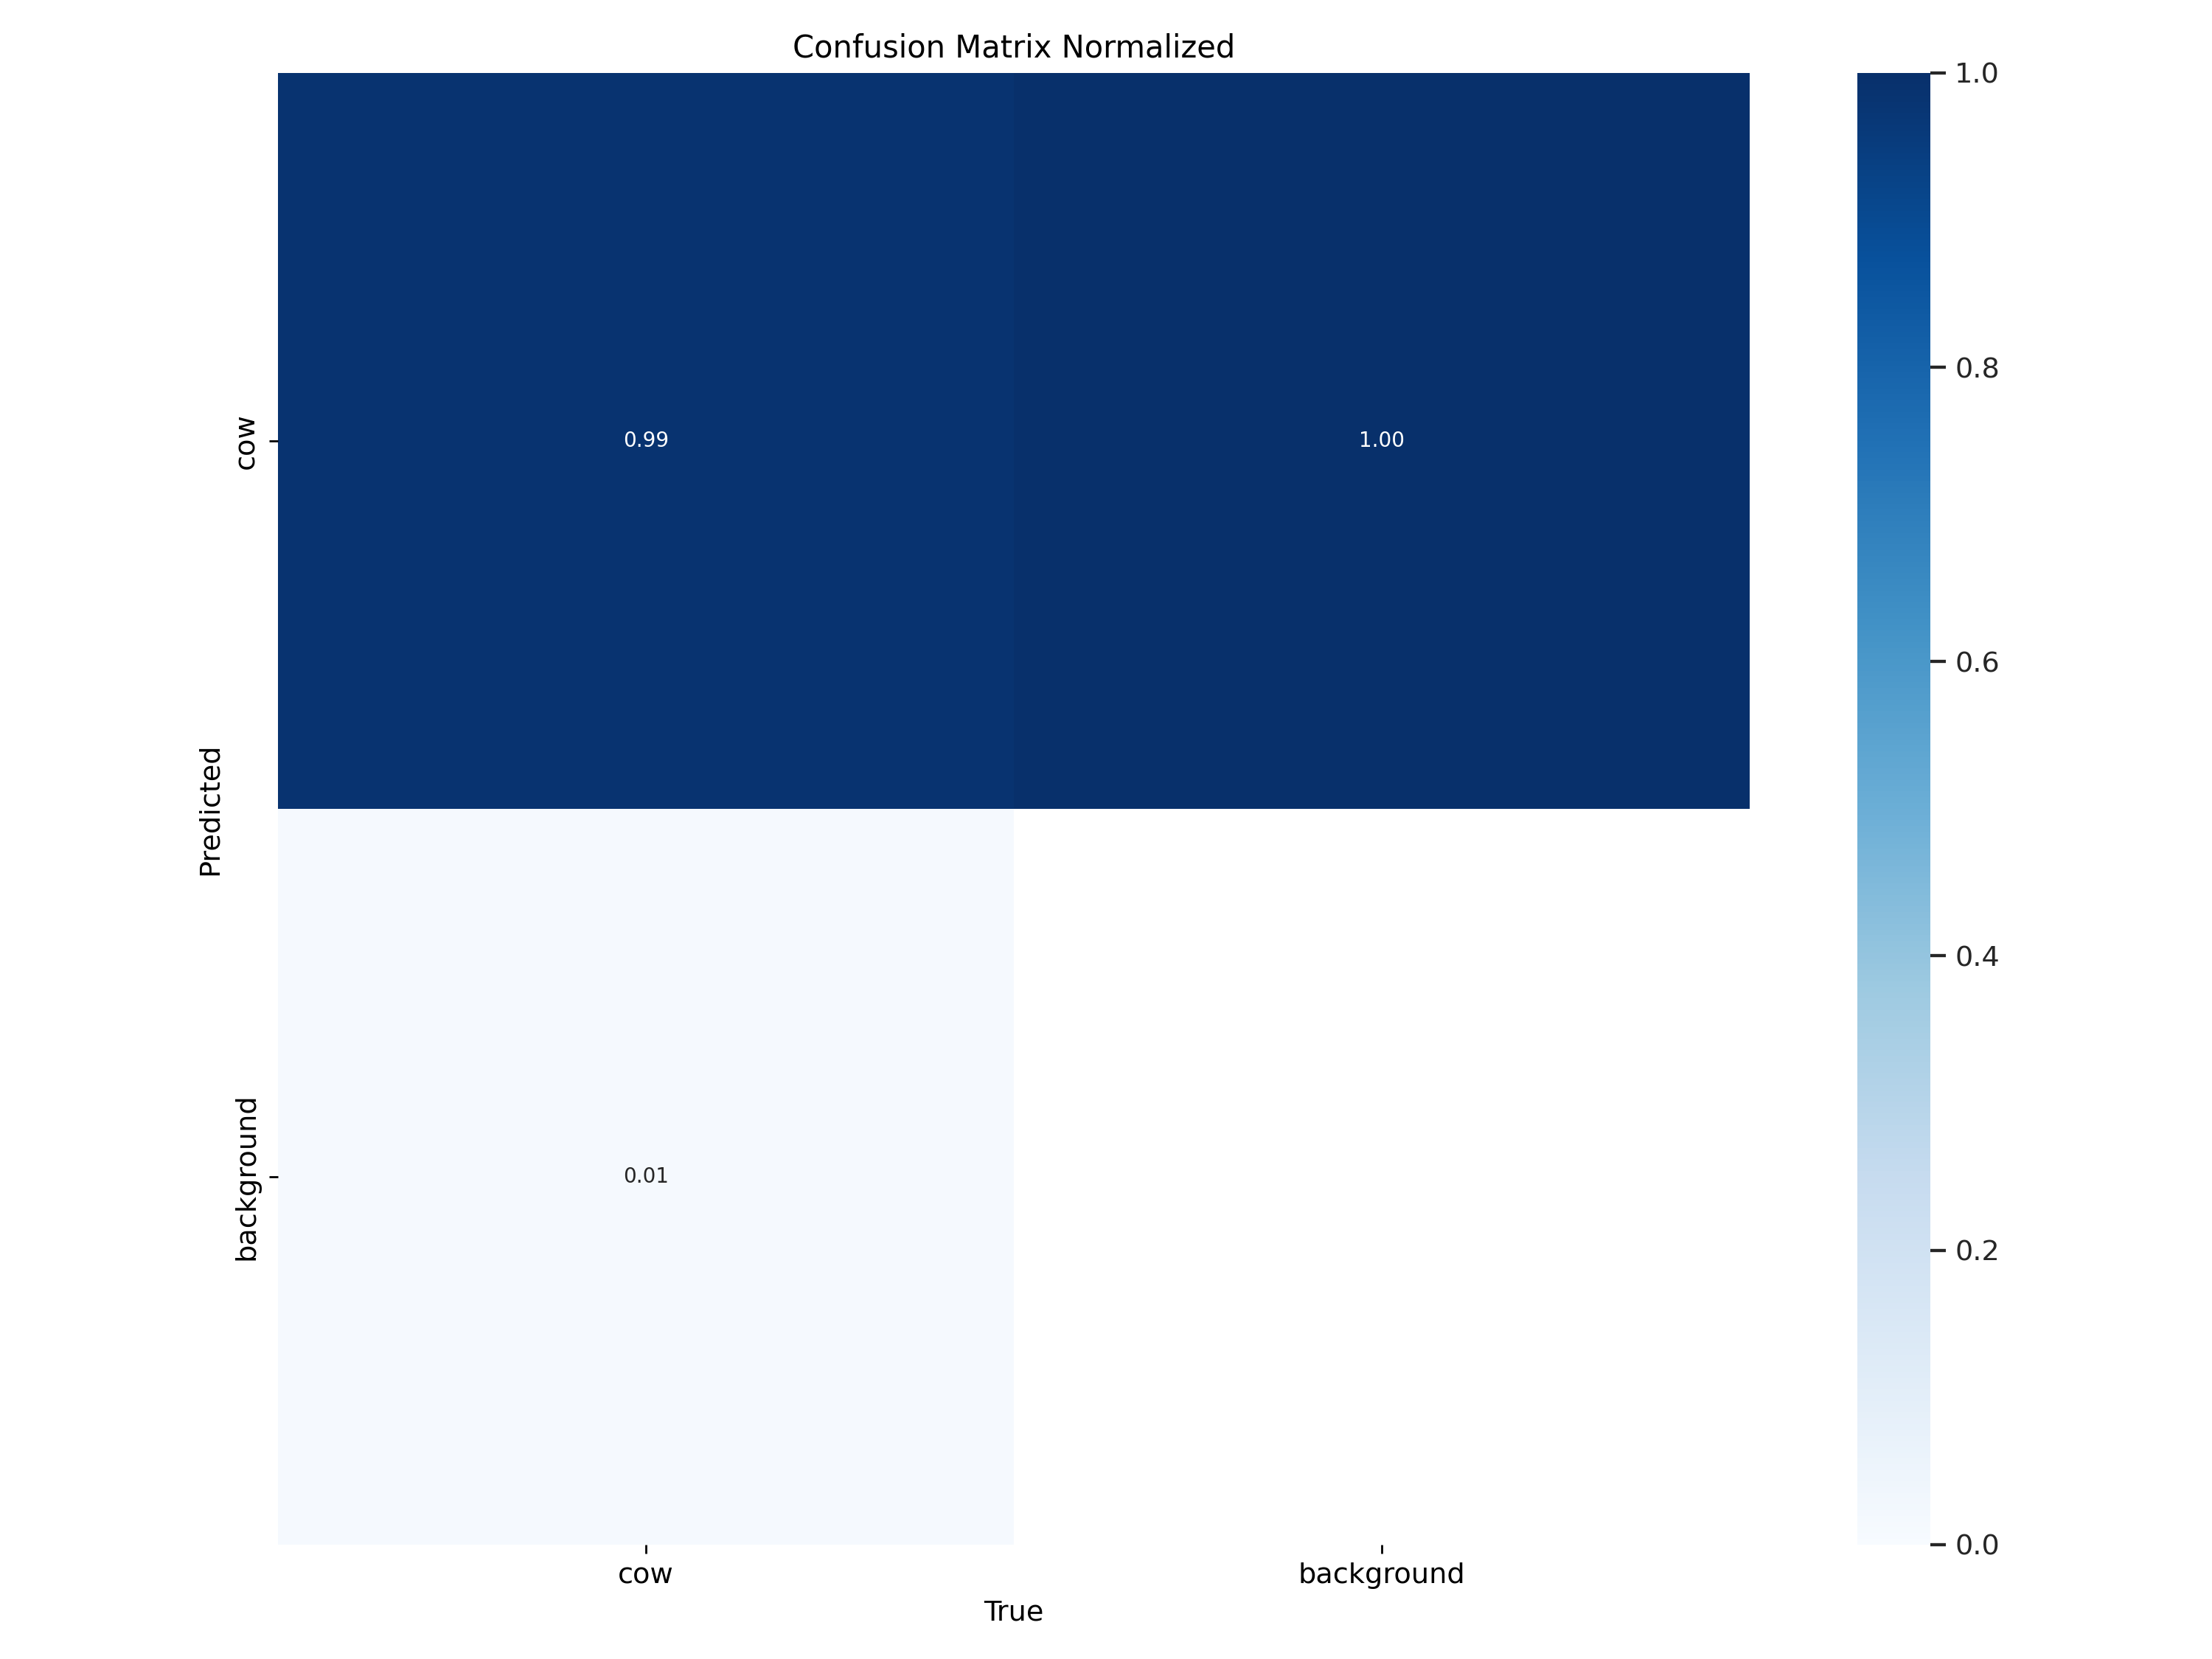

In [ ]:


titulo = 'Matriz de confusion normalizada'

# Mostrar la imagen y el título
display(HTML(f'<h2>{titulo}</h2>'))
Image(filename= f'/content/runs/detect/train/confusion_matrix_normalized.png', width= 600 )

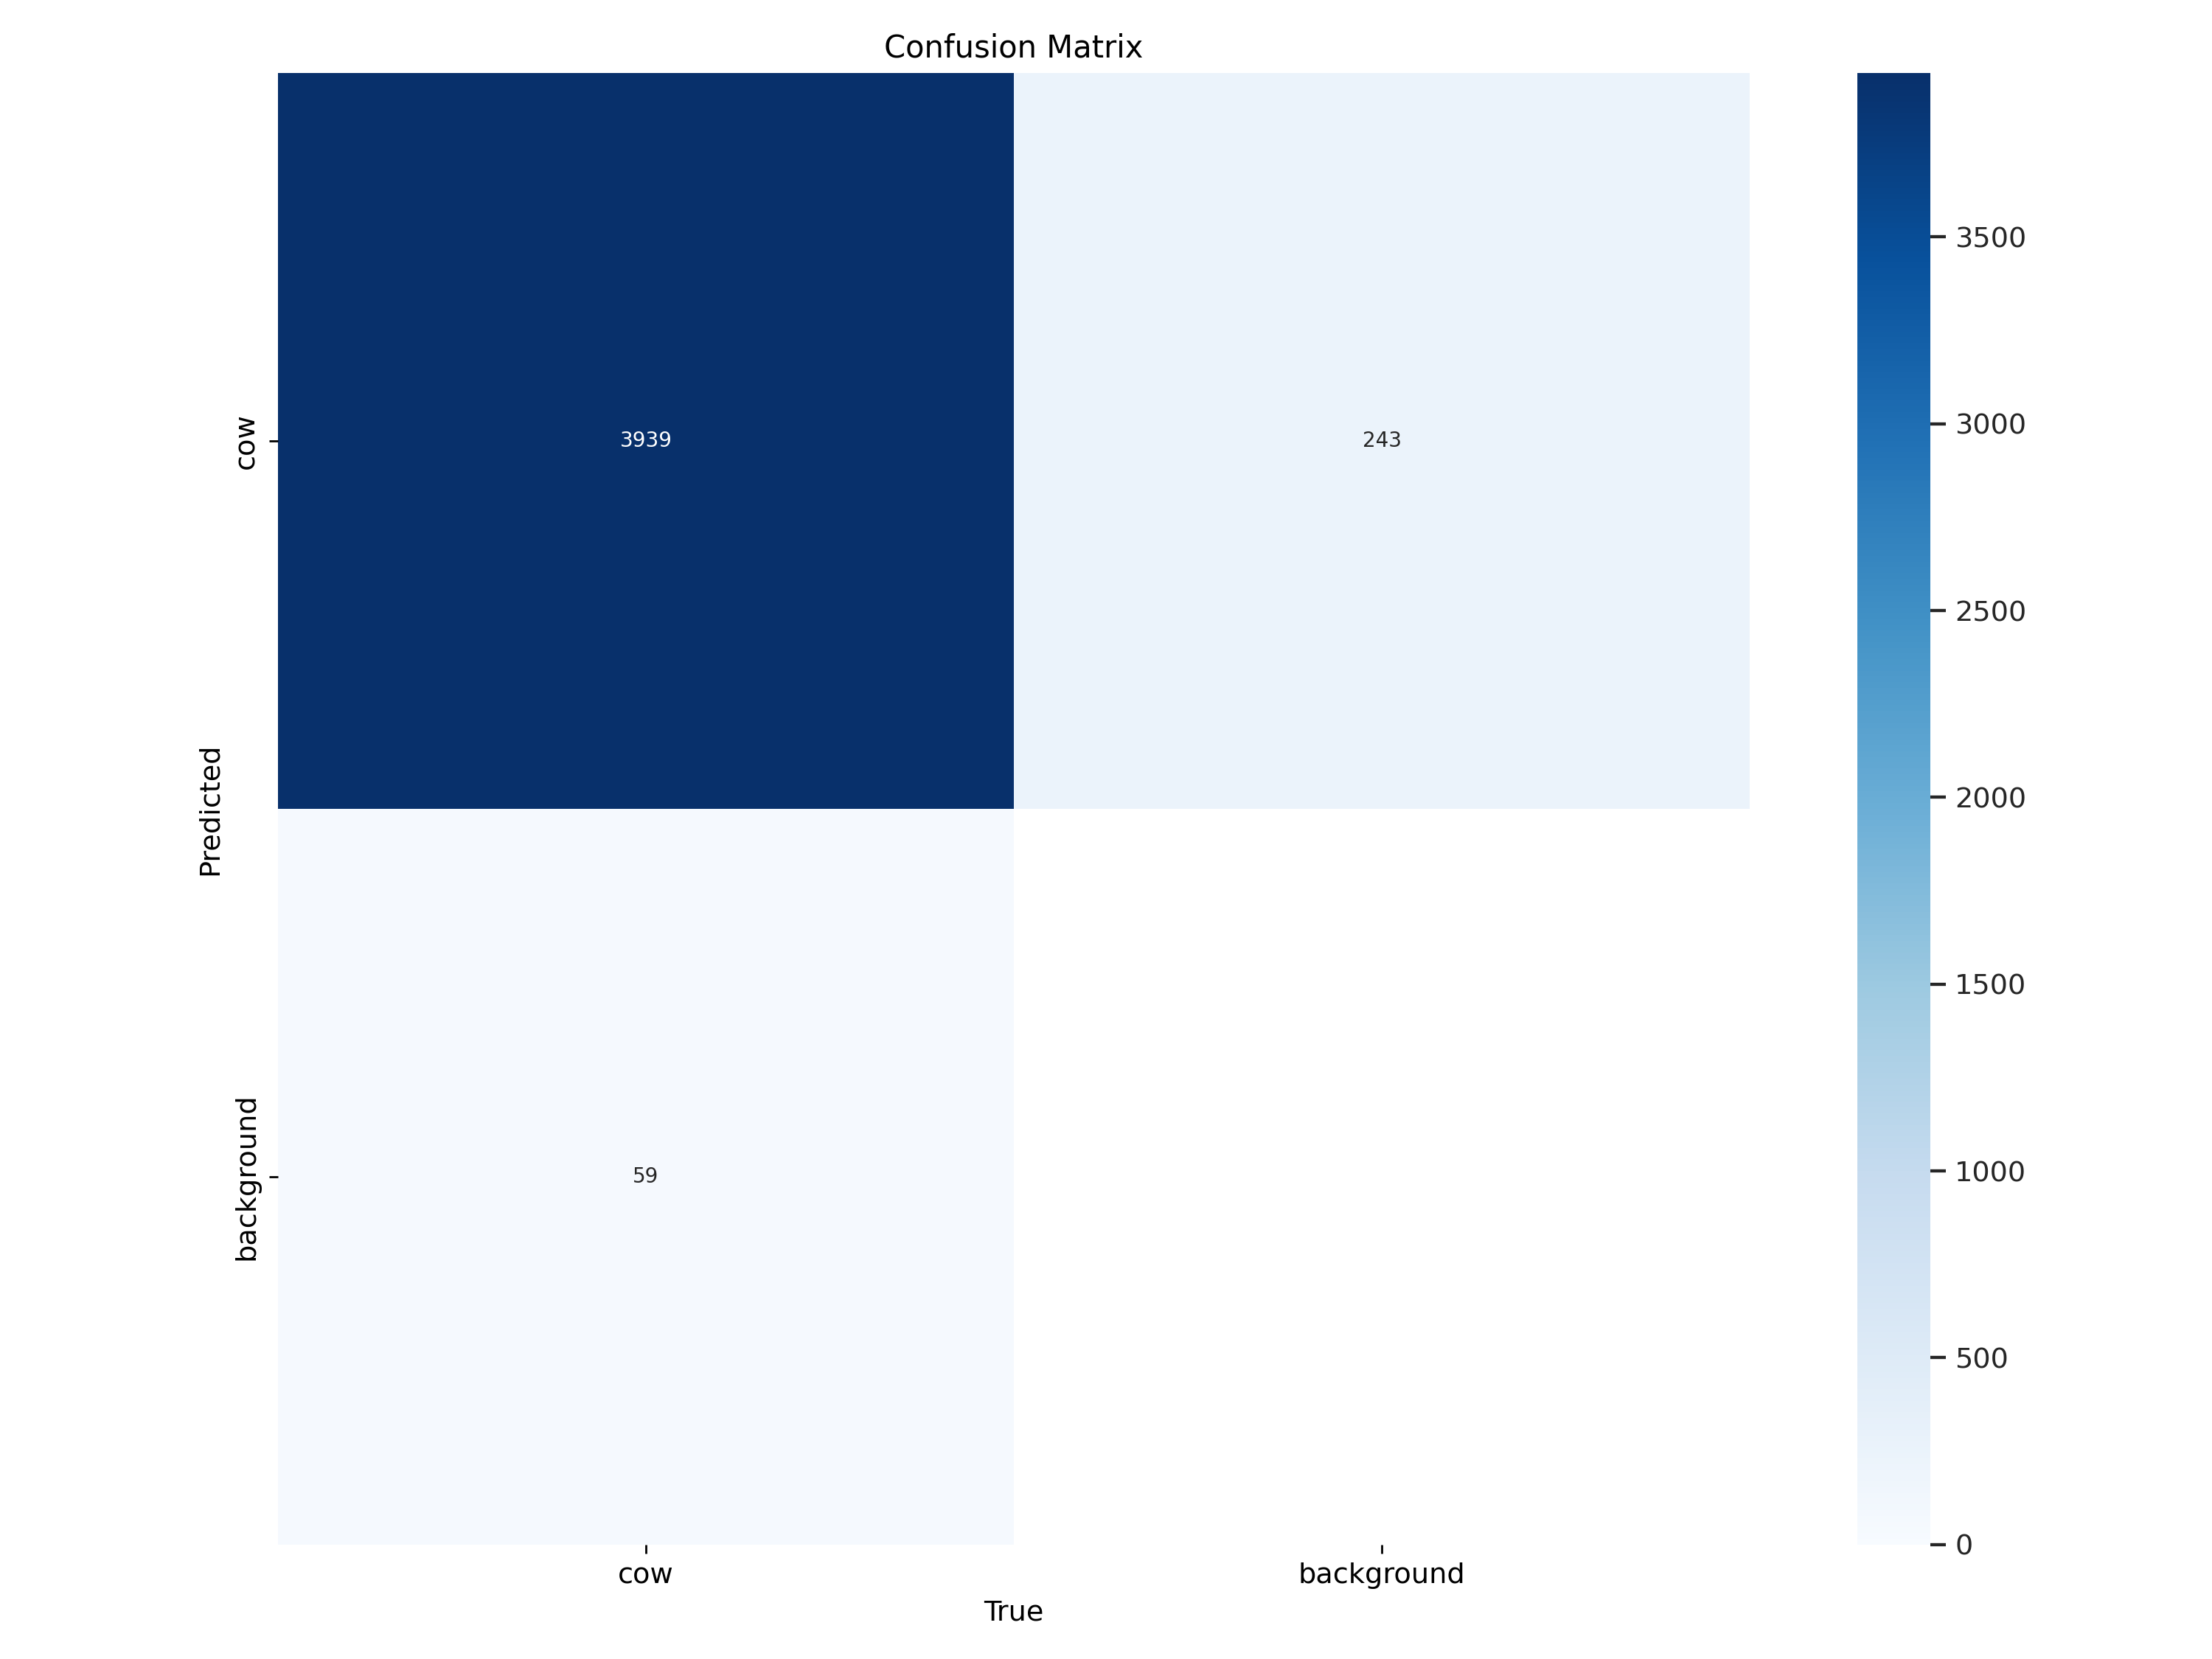

In [ ]:

titulo = 'Matriz de confusion'

# Mostrar la imagen y el título
display(HTML(f'<h2>{titulo}</h2>'))
Image(filename= f'/content/runs/detect/train/confusion_matrix.png', width= 600 )

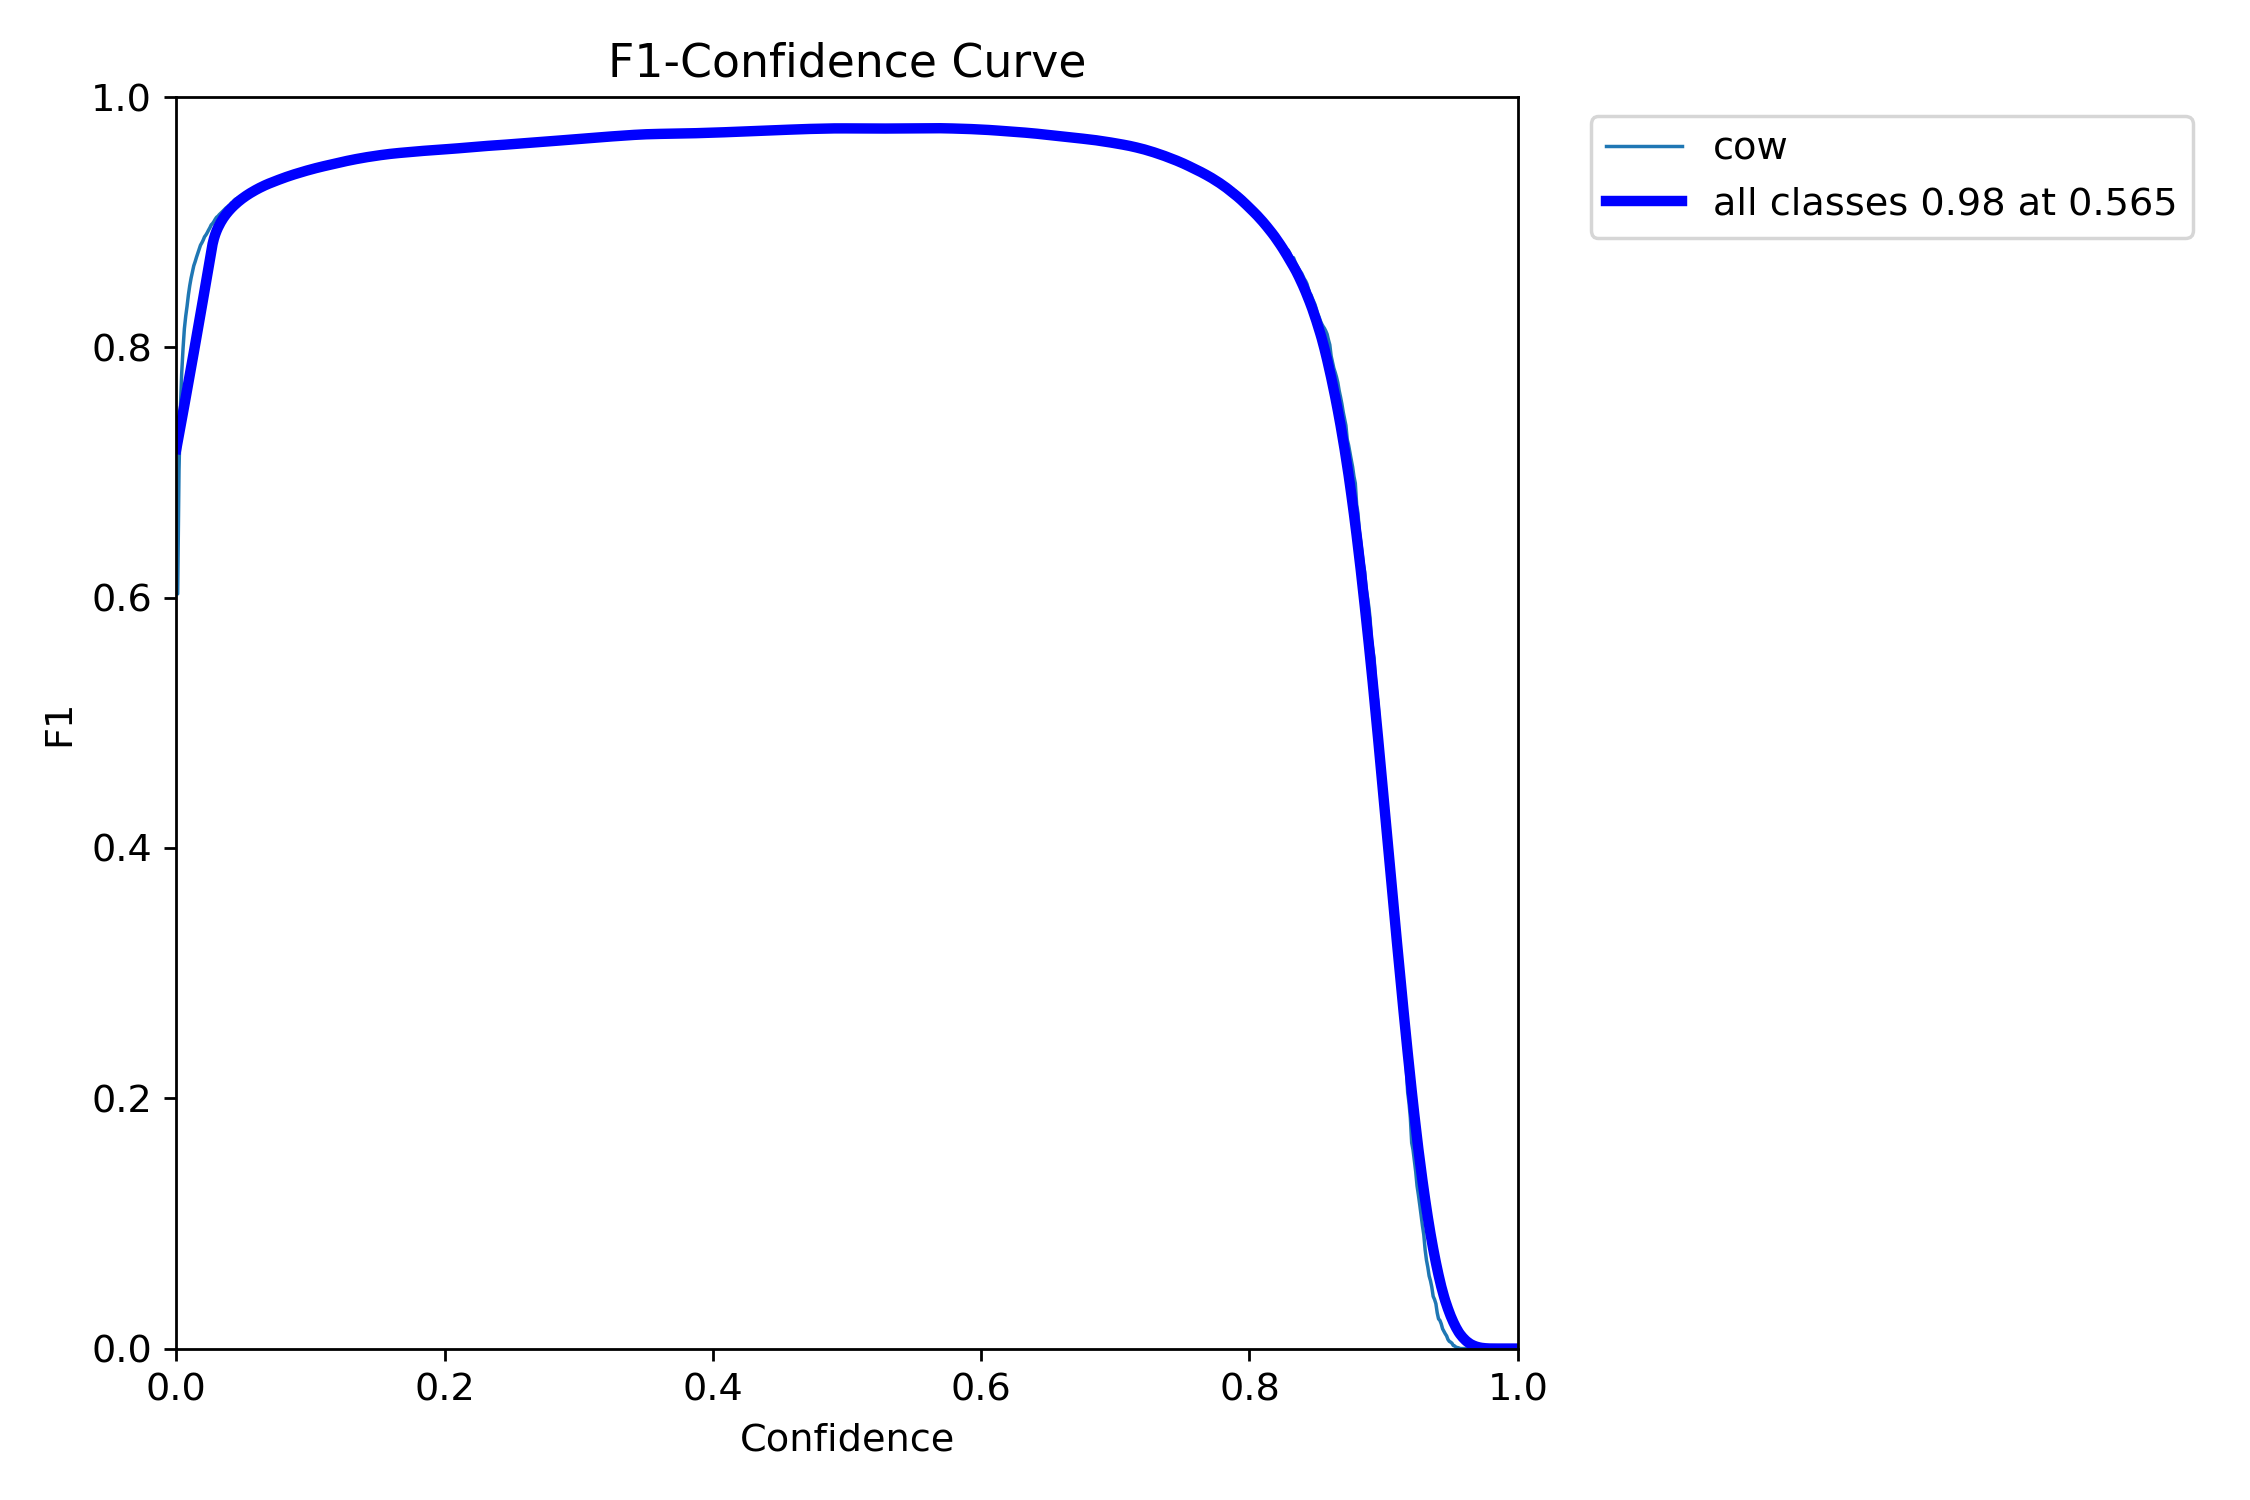

In [ ]:
titulo = 'F1'

# Mostrar la imagen y el título
display(HTML(f'<h2>{titulo}</h2>'))
Image(filename= f'/content/runs/detect/train/F1_curve.png', width= 600 )

##Validacion

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data='/content/cowsV82/cows2v8/configuration.yaml'

##Predicciones para imagenes

In [ ]:

#se carga el modelo con los mejores pesos obtenidos y se define como model para usarlo porteriormente
model= YOLO('/content/runs/detect/train/weights/best.pt')

###Ejemplo imagen uno

In [ ]:
from PIL import Image



# Realiza inferencia con el modelo YOLOv8n en la imagen '050c461d-762a-4d53-8c1f-5985affefc71.jpg'
prueba1 = model('/content/cowsV82/cows2v8/test/images/1b30c671-4499-4a70-991a-79df2333b392.JPG')

num_b=0 # variable para numero de cajas lo cual representara el numero de vacas

for result in prueba1:
    boxes = result.boxes  # Boxes object for bbox outputs
    # Incrementa el contador de cajas con la cantidad de cajas en este resultado
    num_b += len(boxes)

for r in prueba1:
    im_array = r.plot()  # Genera un gráfico de un array de numpy en formato BGR con las predicciones
    im = Image.fromarray(im_array[..., ::-1])  # Convierte el array a una imagen PIL en formato RGB
    im.show()  # Muestra la imagen
    im.save('results.jpg')  # Guarda la imagen con el nombre 'results.jpg'





In [ ]:
from IPython.display import Image, display, HTML

#imprimir resultados
titulo = 'prueba1'
im = f'{num_b} vacas'  # Formatea la cadena con el número de vacas

# Mostrar el título
display(HTML(f'<h2>{titulo}</h2>'))

# Mostrar el número de vacas
display(HTML(f'<h2>{im}</h2>'))

# Mostrar la imagen
Image(filename='/content/results.jpg', width=600)

###Ejemplo Imagen dos

In [ ]:
#imagen dos
from PIL import Image



# Realiza inferencia con el modelo YOLOv8n en la imagen '050c461d-762a-4d53-8c1f-5985affefc71.jpg'
prueba2 = model('/content/cowsV82/cows2v8/test/images/a55cf9ef-0822-4a30-9088-0528f140e8b9.JPG')

num_b=0 # variable para numero de cajas lo cual representara el numero de vacas

for result in prueba2:
    boxes = result.boxes  # Boxes object for bbox outputs
    # Incrementa el contador de cajas con la cantidad de cajas en este resultado
    num_b += len(boxes)

for r in prueba2:
    im_array = r.plot()  # Genera un gráfico de un array de numpy en formato BGR con las predicciones
    im = Image.fromarray(im_array[..., ::-1])  # Convierte el array a una imagen PIL en formato RGB
    im.show()  # Muestra la imagen
    im.save('results1.jpg')  # Guarda la imagen con el nombre 'results.jpg'


In [ ]:
from IPython.display import Image, display, HTML

#imprimir resultados
titulo = 'prueba2'
im = f'{num_b} vacas'  # Formatea la cadena con el número de vacas

# Mostrar el título
display(HTML(f'<h2>{titulo}</h2>'))

# Mostrar el número de vacas
display(HTML(f'<h2>{im}</h2>'))

# Mostrar la imagen
Image(filename='/content/results1.jpg', width=600)

##Exportar modelo
El modelo se exporta en modelo de tensorflow lite y en formato onnx. estos modelos se encuentran en la carpeta 'models' en cada uno de los formatos

In [1]:
!pip install tensorflow==2.13.1



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 108.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 50.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Fou

In [1]:
import tensorflow as tf
print(tf.__version__)


2.13.1


In [5]:
#exportar modelo
model = YOLO('/content/40epocs.pt')  # se carga el modelo preentrenado con los mejores pesos

# Export the model
model.export(format='tflite')

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/40epocs.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)
requirements: Ultralytics requirements ['onnx', 'onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 180.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 183.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 111.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 127.9 MB/s eta 0:00:00
     ━━━━━━

'/content/40epocs_saved_model/40epocs_float32.tflite'

##EXPORTAR MODELO PARA DEPLOYMENT WEB

Para ello se exporta el modelo a roboflow el cual ofrece una pagina web como ejemplo en el cual se pued hacer el deployment del modelo.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ncFbmc0EOaCWNDRZWD0a")
project = rf.workspace("detection-kvliu").project("cow_detect")
dataset = project.version(3).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cow_detect-3 in yolov8:: 100%|██████████| 2812/2812 [00:28<00:00, 99.90it/s] 


In [ ]:
project.version(3).deploy(model_type="yolov8", model_path="/content/runs/detect/train")

View the status of your deployment at: https://app.roboflow.com/detection-kvliu/cow_detect/3
Share your model with the world at: https://universe.roboflow.com/detection-kvliu/cow_detect/model/3
